# Book Analysis

### Dataset Creation

In [46]:
import pandas as pd

In [47]:
from utils.regression_utils import load_books_movies
df_books_movies = load_books_movies()

In [48]:
from utils.regression_utils import adjust_for_inflation

books_movies_adj = adjust_for_inflation(df_books_movies, ['budget', 'revenue'], is_plotting_enabled=True)
books_movies_adj.head()

,movie_id,movie_cluster,title,release_date,runtime_x,language,country,genres,movie_year,index,...,rb_ratio,book_id,normalized_rating_x,standardized_rating_x,normalized_rating_y,standardized_rating_y,length,review_count,adjusted_budget,adjusted_revenue
0,77856,/m/0kcn7,Mary Poppins,1964-08-27,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,1279,...,17.180397,152380.0,0.802817,1.263138,0.680000,0.676011,209.0,4387.0,4.506424e+07,7.742215e+08
1,196176,/m/01bwgr,Straw Dogs,1971-11-03,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama""}",1971,1759,...,1.478088,10051695.0,0.760563,0.966398,0.476667,-1.444329,192.0,54.0,1.265706e+07,1.870826e+07
2,6703617,/m/0gj6pd,The Forbidden Kingdom,2008-04-04,105.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/08322"": ""Wuxia"", ""/m/0hj3n2k"": ""Fantasy A...",2008,1090,...,2.325575,100237.0,0.633803,0.076178,0.670000,0.571732,306.0,420.0,5.950994e+07,1.383948e+08
3,24416479,/m/07s7_c0,Beastmaster 2: Through the Portal of Time,1991-08-31,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0dz8b"": ""Sword and sorcery"", ""/m/06n90"": ...",1991,213,...,0.144888,7476314.0,0.253521,-2.594481,0.666667,0.536973,0.0,68.0,1.026305e+07,1.486988e+06
4,76345,/m/0k47y,Shaft,1971-06-25,98.0,"{""/m/02h40lc"": ""English Language"", ""/m/0t_2"": ...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1971,1729,...,3.030404,1227993.0,0.633803,0.076178,0.450000,-1.722406,NaN,25.0,2.301284e+07,6.973822e+07


In [49]:
# from utils.regression_utils import merge_and_clean_sim
# #This function can be used to merge the dataset with the similarity scores. 
# #Since there are a lot of Nan values in the similarity column, the nan values are dropped. If we want to do it on the entire dataset, books_movies_adj can be merged directly with the book genres. 
# merged_df = merge_and_clean_sim(books_movies_adj)

merged_df = books_movies_adj.copy(deep=True)

In [50]:
book_ids = merged_df[['book_id', 'movie_id', 'adjusted_revenue']]
book_genres = pd.read_csv('../data/book_genres.csv')
book_genres_df = book_genres.groupby('book_id')['genre'].apply(lambda x: ', '.join(x)).reset_index()
book_genres_df.head()

,book_id,genre
0,1,"Fantasy, Young Adult, Fiction"
1,2,"Fantasy, Young Adult, Fiction"
2,3,"Fantasy, Young Adult, Fiction"
3,5,"Fantasy, Young Adult, Fiction"
4,6,"Fantasy, Young Adult, Fiction, Childrens, Adve..."


In [51]:
book_sim_genres = book_ids.merge(book_genres_df[['book_id', 'genre']], on= 'book_id', how= 'inner')
print(len(book_sim_genres))
book_sim_genres.head()


657


,book_id,movie_id,adjusted_revenue,genre
0,152380.0,77856,7.742215e+08,"Classics, Fantasy, Childrens, Fiction"
1,10051695.0,196176,1.870826e+07,"Fiction, Thriller, Horror, Mystery, Crime, Eur..."
2,100237.0,6703617,1.383948e+08,"Classics, Fiction, Cultural, China, Fantasy, M..."
3,7476314.0,24416479,1.486988e+06,"Fantasy, Science Fiction, Fiction"
4,1227993.0,76345,6.973822e+07,"Fiction, Mystery, Crime, Thriller"


In [52]:
from utils.regression_utils import books_features_preprocessing
books_df_final = books_features_preprocessing(book_sim_genres=book_sim_genres)


In [53]:
books_df_final.columns

Index(['book_id', 'movie_id', 'adjusted_revenue', 'genre', 'title', 'year',
       'avg_rating', 'rating_count', 'review_count', 'series', 'series_num',
       'author', 'description', 'length', 'five_stars', 'four_stars',
       'three_stars', 'two_stars', 'one_star', 'cover_image',
       'standardized_rating', 'normalized_rating', 'part_of_series',
       'one_star_percentage', 'two_stars_percentage', 'three_stars_percentage',
       'four_stars_percentage', 'five_stars_percentage'],
      dtype='object')

In [54]:
from utils.regression_utils import multi_one_hot_encode_columns

# how to keep information about the autor? We will take out the series_num because many nan, might change later
books_df_final.drop(columns=['movie_id', 'book_id', 'title', 'series', 'series_num', 'author', 'description', 'cover_image', 'five_stars', 'four_stars', 'three_stars', 'two_stars', 'one_star'], inplace=True)
books_df_final.columns
books_regression = multi_one_hot_encode_columns(
    books_df_final,
    column_names_mohe=['genre'], 
    threshold=50
)



In [55]:
books_regression.dropna(inplace=True)

In [56]:
#books_regression.to_csv('books_regression.csv')

### Regression

In [57]:
from utils.regression_utils import create_train_test_split

X_train, X_test, y_train, y_test = create_train_test_split(
    books_regression, 
    target_column='adjusted_revenue', 
    should_split_based_on_book=False, 
    test_size=0.2, 
    seed=42
)['all']

In [58]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

model = sm.OLS(y_train, X_train)
results = model.fit()


y_pred = results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("RMSE value:", rmse)

results.summary()

RMSE value: 615181945.9330992


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     7.620
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           4.34e-23
Time:                        09:41:31   Log-Likelihood:                -10493.
No. Observations:                 508   AIC:                         2.104e+04
Df Residuals:                     481   BIC:                         2.115e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.807e+08   1.03e+07     17.527      0.000     1.6e+08    2.01e+08
year                    1.257e+07   1.09e+07      1.152      0.250   -8.87e+06     3.4e+07
avg_rating             -8.949e+20   1.12e+21     -0.798      0.425    -3.1e+21    1.31e+21
rating_count            1.652e+08   3.18e+07      5.200      0.000    1.03e+08    2.28e+08
review_count           -1.195e+08   3.06e+07     -3.911      0.000    -1.8e+08   -5.95e+07
length                  7.247e+06   1.25e+07      0.579      0.563   -1.73e+07    3.18e+07
standardized_rating    -1.529e+21   1.92e+21     -0.798      0.425   -5.29e+21    2.24e+21
normalized_rating       2.424e+21   3.04e+21      0.798      0.425   -3.55e+21    8.39e+21
part_of_series              4e+07   1.16e+07      3.438      0.001    1.71e+07    6.29e+07
one_star_percentage     7.137e+16   8.95e+16      0.798      0.425   -1.04e+17    2.47e+17
two_stars_percentage    1.146e+17   1.44e+17      0.798      0.425   -1.68e+17    3.97e+17
three_stars_percentage  2.398e+17   3.01e+17      0.798      0.425   -3.51e+17    8.31e+17
four_stars_percentage   1.759e+17   2.21e+17      0.798      0.425   -2.57e+17    6.09e+17
five_stars_percentage   3.548e+17   4.45e+17      0.798      0.425   -5.19e+17    1.23e+18
genre_count            -1.263e+07   1.84e+07     -0.686      0.493   -4.88e+07    2.35e+07
genre_Adventure         4.816e+07   1.27e+07      3.779      0.000    2.31e+07    7.32e+07
genre_Childrens        -1.369e+07    1.4e+07     -0.980      0.328   -4.12e+07    1.38e+07
genre_Classics          3.327e+07   1.33e+07      2.499      0.013    7.11e+06    5.94e+07
genre_Crime             -2.89e+07   1.72e+07     -1.684      0.093   -6.26e+07    4.83e+06
genre_Cultural         -1.261e+07   1.35e+07     -0.931      0.352   -3.92e+07     1.4e+07
genre_Fantasy           3.207e+07   1.31e+07      2.452      0.015    6.37e+06    5.78e+07
genre_Fiction           5.265e+06   1.14e+07      0.464      0.643   -1.71e+07    2.76e+07
genre_Historical       -5.775e+05   1.35e+07     -0.043      0.966   -2.72e+07     2.6e+07
genre_Horror            8.357e+06   1.18e+07      0.706      0.480   -1.49e+07    3.16e+07
genre_Literature       -2.671e+07   1.41e+07     -1.899      0.058   -5.44e+07    9.33e+05
genre_Mystery           -1.85e+06   1.87e+07     -0.099      0.921   -3.85e+07    3.48e+07
genre_Romance           2.748e+04   1.21e+07      0.002      0.998   -2.38e+07    2.39e+07
genre_Science Fiction  -2.568e+07   1.25e+07     -2.046      0.041   -5.03e+07   -1.02e+06
genre_Thriller          5.067e+07   1.61e+07      3.145      0.002     1.9e+07    8.23e+07
genre_Young Adult      -1.511e+07   1.31e+07     -1.149      0.251   -4.09e+07    1.07e+07
==============================================================================
O

In [59]:
color_palette = {
    **{feature: ('#4477AA' if feature == 'rating_count' else
                 '#EE6677' if feature == 'genre_Thriller' else
                 '#CCBB44' if feature == 'genre_Adventure' else
                 '#AA3377' if feature == 'part_of_series' else
                 '#228833' if feature == 'review_count' else
                 '#66CCEE' if feature == 'three_stars_percentage' else
                 '#999933' if feature == 'five_stars_percentage' else
                 'gray') for feature in [
        'const', 'year', 'avg_rating', 'rating_count', 'review_count', 'length',
        'standardized_rating', 'normalized_rating', 'part_of_series',
        'one_star_percentage', 'two_stars_percentage', 'three_stars_percentage',
        'four_stars_percentage', 'five_stars_percentage', 'genre_count',
        'genre_Adventure', 'genre_Childrens', 'genre_Classics', 'genre_Crime',
        'genre_Cultural', 'genre_Fantasy', 'genre_Fiction', 'genre_Historical',
        'genre_Horror', 'genre_Literature', 'genre_Mystery', 'genre_Romance',
        'genre_Science Fiction', 'genre_Thriller', 'genre_Young Adult']}
}

In [92]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

to_include = results.params[results.pvalues < 0.10][1:].sort_values() # get only those with significant pvalues
confidence_intervals = results.conf_int().loc[to_include.index]
ci_values = confidence_intervals.values
colors = [color_palette.get(feature, "#eb5600") for feature in to_include.index]  

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=to_include.values / 1e6,  # Scale x-axis values to 1e6
    y=to_include.index,
    mode='markers',
    marker=dict(size=10, color=colors),
    name="Proportional Effect",
    hoverinfo="text",
    text=[
        f"Feature: {feature}<br>Proportional Effect: {effect / 1e6:.2f} Millions<br>CI: ({ci[0] / 1e6:.2f} Millions, {ci[1] / 1e6:.2f} Millions)"
        for feature, effect, ci in zip(to_include.index, to_include.values.astype(float), ci_values.astype(float))
    ]
))


for i, (ci, color) in enumerate(zip(ci_values, colors)):
    fig.add_shape(
        type="line",
        x0=ci[0] / 1e6,  # Lower CI bound
        x1=ci[1] / 1e6,  # Upper CI bound
        y0=i,  
        y1=i,  
        line=dict(color=color, width=4, dash='solid')  
    )

fig.add_vline(
    x=0,
    line=dict(color="red", width=1, dash='dash'),
)
fig.update_layout(
    title=dict(
        text="Linear Regression of Books",  # Bold the title
        x=0.02, y=0.97  
    ),
    xaxis=dict(
        title="Proportional Effect (in Millions)",
    ),

    yaxis=dict(
        title="",
        tickmode="array",
        tickvals=list(range(len(to_include.index))),
        ticktext=list(to_include.index)
    ),
    template="plotly_white",
    width=None,
    height=None, 
    margin=dict(t=35, l=20, r=10),
)

fig.show()

In [93]:
html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                .plotly-graph-div {{
                    width: 100% !important;
                    height: 100% !important;
                }}
            </style>
        </head>
        <body>
            <div id="plotly-div"></div>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <script>
                var plotly_data = {fig.to_json()};
                Plotly.newPlot('plotly-div', plotly_data.data, plotly_data.layout);
            </script>
        </body>
        </html>
        """
with open('reg_books.html', 'w') as f:
    f.write(html_content)

### Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

In [41]:
param_grid = {

    'n_estimators': [2, 5, 10, 25, 100, 150],

    'max_depth': [10, 15, 20],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [2, 4, 6, 8],
 
    'bootstrap': [False, True]

}

model = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_params = grid_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [42]:
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train.ravel())

predictions = best_model.predict(X_test)

rmse = mean_squared_error(y_test, predictions)
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 3.732345564335084e+17
R^2 Score: 0.10574117158378515


In [94]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create interactive bar chart
fig = px.bar(
    feature_importances.head(10),
    y='Feature',
    x='Importance',
    color='Feature',
    color_discrete_map=color_palette,
)

fig.update_layout(
    title=dict(
        text="Random Forest Importances of Books",  
        x=0.02,
        y=0.97 
    ),
    yaxis=dict(
        title="",
        tickmode="array",
    ),
    template="plotly_white",
    width=None,
    height=None,     
    showlegend=False,
    margin=dict(t=60, l=20, r=10),    
)

# Add tooltips for better interactivity
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>Importance: %{x:.3f}<extra></extra>', 

)


fig.show()

In [95]:
html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                .plotly-graph-div {{
                    width: 100% !important;
                    height: 100% !important;
                }}
            </style>
        </head>
        <body>
            <div id="plotly-div"></div>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <script>
                var plotly_data = {fig.to_json()};
                Plotly.newPlot('plotly-div', plotly_data.data, plotly_data.layout);
            </script>
        </body>
        </html>
        """
with open('forest_books.html', 'w') as f:
    f.write(html_content)

In [20]:
coefficients = results.params
p_values = results.pvalues
coeff_df = pd.DataFrame({
    'Coefficient': coefficients,
    'P-Value': p_values
})
coeff_df['Feature'] = coeff_df.index
# Display the DataFrame
display(coeff_df)

,Coefficient,P-Value,Feature
const,1.806674e+08,1.509599e-53,const
year,1.257047e+07,2.499193e-01,year
avg_rating,-8.948662e+20,4.254227e-01,avg_rating
rating_count,1.652487e+08,2.953175e-07,rating_count
review_count,-1.195096e+08,1.053134e-04,review_count
length,7.246779e+06,5.625895e-01,length
standardized_rating,-1.528909e+21,4.254227e-01,standardized_rating
normalized_rating,2.423775e+21,4.254227e-01,normalized_rating
part_of_series,4.000388e+07,6.366251e-04,part_of_series
one_star_percentage,7.136816e+16,4.254227e-01,one_star_percentage


In [21]:
combined_features = feature_importances.merge(coeff_df, on = 'Feature', how='inner')

In [22]:
display(combined_features)

,Feature,Importance,Coefficient,P-Value
0,three_stars_percentage,0.241020,2.398151e+17,4.254227e-01
1,rating_count,0.083241,1.652487e+08,2.953175e-07
2,genre_Thriller,0.069629,5.067042e+07,1.760989e-03
3,part_of_series,0.066994,4.000388e+07,6.366251e-04
4,review_count,0.057545,-1.195096e+08,1.053134e-04
5,genre_Adventure,0.056452,4.815506e+07,1.772395e-04
6,five_stars_percentage,0.047727,3.548204e+17,4.254227e-01
7,normalized_rating,0.044718,2.423775e+21,4.254227e-01
8,year,0.044168,1.257047e+07,2.499193e-01
9,length,0.036434,7.246779e+06,5.625895e-01


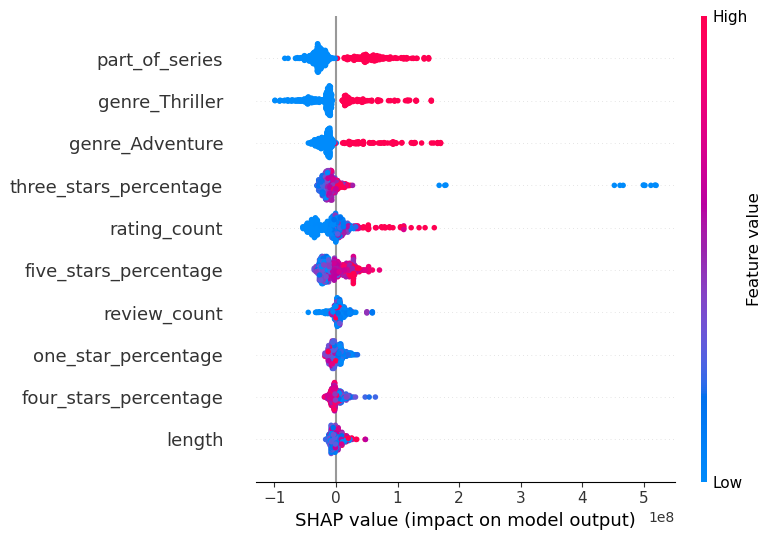

In [83]:
import shap

# Assuming you have a trained Random Forest model `rf_model` and your data is `X_train`
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, max_display=10, show = False)

#plt.savefig('books_shap.svg', format='svg', dpi = 1200)

